In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
comprobantes = pd.read_csv('/Users/lolonastri/Desktop/POO_UCEMA/modelos_primer_parcial/dolarblue_y_recibos/recibos_facts_debitos.csv')
comprobantes

,Unnamed: 0,Nro Comprobante,Fecha,Total,ID_cliente
0,0,FAC B0001-00000001,2015-12-10,1.00,675.0
1,1,FAC B0001-00000002,2015-12-10,1.00,675.0
2,2,FAC B0001-00000003,2015-12-28,999.99,123.0
3,3,FAC B0001-00000004,2015-12-28,34.21,123.0
4,4,FAC B0001-00000005,2015-12-28,0.71,123.0
...,...,...,...,...,...
41329,41329,REC X0099-00006794,2018-09-04,2446.00,12.0
41330,41330,REC X0099-00006794,2014-09-04,NaN,NaN
41331,41331,REC X0099-00006794,2014-09-04,NaN,NaN
41332,41333,REC X0099-00006794,2022-09-04,NaN,NaN


___

# 1) Cuáles son las características principales del DF?

a. Cantidad de rows y columnas.

b. Clases de datos

In [3]:
# A) Cantidad de rows y columnas

comprobantes.shape

(41334, 5)

In [4]:
print("Este dataset tiene " + str(comprobantes.shape[0]) + " filas y " + str(comprobantes.shape[1]) + " columnas")

Este dataset tiene 41334 filas y 5 columnas


In [5]:
# B) Clases de datos

comprobantes.dtypes

Unnamed: 0           int64
Nro Comprobante     object
Fecha               object
Total              float64
ID_cliente         float64
dtype: object

___

# 2) El dataset cuenta con datos faltantes?

a. Muestre la cantidad de faltantes por columnas

b. Que porcentaje de faltantes hay

c. Muestre las filas con datos faltantes

d. Sí hay faltantes, ¿Cómo procederán a hacer el tratamiento de los mismos?

e. Haga el tratamiento de los valores faltantes en caso de creerlo necesario

In [6]:
# A) Muestre la cantidad de faltantes por columnas

comprobantes.isna().sum()

Unnamed: 0         0
Nro Comprobante    0
Fecha              0
Total              3
ID_cliente         4
dtype: int64

In [7]:
# B) Que porcentaje de faltantes hay

(comprobantes.isna().sum()/len(comprobantes)).round(6)

Unnamed: 0         0.000000
Nro Comprobante    0.000000
Fecha              0.000000
Total              0.000073
ID_cliente         0.000097
dtype: float64

In [8]:
# C) Muestre las filas con datos faltantes

comprobantes[comprobantes.isna().any(axis=1)]

,Unnamed: 0,Nro Comprobante,Fecha,Total,ID_cliente
41330,41330,REC X0099-00006794,2014-09-04,NaN,NaN
41331,41331,REC X0099-00006794,2014-09-04,NaN,NaN
41332,41333,REC X0099-00006794,2022-09-04,NaN,NaN
41333,41334,REC X0099-00006794,2022-03-01,10000000.0,NaN


In [9]:
# D) Sí hay faltantes, ¿Cómo procederán a hacer el tratamiento de los mismos?

comprobantes["Nro Comprobante"].value_counts()

Nro Comprobante
REC X0099-00006794    6
N/D B0099-00010127    1
N/D B0099-00010149    1
N/D B0099-00010150    1
N/D B0099-00010151    1
                     ..
N/D B0001-00000417    1
N/D B0001-00000418    1
N/D B0001-00000419    1
N/D B0001-00000420    1
N/D B0099-00003262    1
Name: count, Length: 41329, dtype: int64

In [10]:
comprobantes_repetidos = comprobantes[(comprobantes["Nro Comprobante"] == "REC X0099-00006794") & (comprobantes["Unnamed: 0"] != 41328)] # Me quedo solamente con este comprobante
comprobantes_repetidos

,Unnamed: 0,Nro Comprobante,Fecha,Total,ID_cliente
41329,41329,REC X0099-00006794,2018-09-04,2446.0,12.0
41330,41330,REC X0099-00006794,2014-09-04,NaN,NaN
41331,41331,REC X0099-00006794,2014-09-04,NaN,NaN
41332,41333,REC X0099-00006794,2022-09-04,NaN,NaN
41333,41334,REC X0099-00006794,2022-03-01,10000000.0,NaN


In [11]:
# E) Haga el tratamiento de los valores faltantes en caso de creerlo necesario

comprobantes = comprobantes.drop(comprobantes_repetidos.index, axis=0) # Borro las filas que no me sirven
comprobantes

,Unnamed: 0,Nro Comprobante,Fecha,Total,ID_cliente
0,0,FAC B0001-00000001,2015-12-10,1.00,675.0
1,1,FAC B0001-00000002,2015-12-10,1.00,675.0
2,2,FAC B0001-00000003,2015-12-28,999.99,123.0
3,3,FAC B0001-00000004,2015-12-28,34.21,123.0
4,4,FAC B0001-00000005,2015-12-28,0.71,123.0
...,...,...,...,...,...
41324,41324,REC X0099-00006790,2018-09-04,2000.00,16.0
41325,41325,REC X0099-00006791,2018-09-04,1000.00,931.0
41326,41326,REC X0099-00006792,2018-09-04,2550.00,650.0
41327,41327,REC X0099-00006793,2018-09-04,2900.00,528.0


In [12]:
comprobantes[comprobantes.isna().any(axis=1)]

,Unnamed: 0,Nro Comprobante,Fecha,Total,ID_cliente


___

# 3) Imprima las estadísticas básicas del dataset.

In [13]:
comprobantes.describe()

,Unnamed: 0,Total,ID_cliente
count,41329.000000,41329.000000,41329.000000
mean,20664.000000,1060.476605,483.257543
std,11930.798974,1300.031764,274.810329
min,0.000000,0.000000,0.000000
25%,10332.000000,331.410000,242.000000
50%,20664.000000,998.980000,476.000000
75%,30996.000000,1000.000000,733.000000
max,41328.000000,56000.000000,964.000000


___

# 4) ¿Qué es un dato outlier? ¿Cómo procedería al análisis del mismo?

#### Un dato outlier es un dato que se encuentra muy alejado del resto de los datos, se lo conoce como anómalo. Para analizarlo, primero hay que ver si es un dato erroneo o no. Si es erroneo, se lo debe eliminar. Si no es erroneo, se lo debe analizar para ver si es un dato que se puede considerar como un outlier o no. Si es un outlier, se lo debe eliminar. Si no es un outlier, se lo debe dejar.

#### Un dato outlier es un dato que está fuera de la distribución de una variable. Muchas veces los valores outliers pueden ser datos mal imputados pero otras veces pueden aportar información importante sobre el caso. Por ejemplo en un caso de Fraude, los casos outliers pueden significar un patrón a analizar. En este dataset tenemos que el valor más cercano al valor máximo en el Valor Total a 10000000 es 56000 representando un 177% más respecto a este segundo valor.

___

# 5) Cambie el nombre de las columnas a "nro_comprobante", "fecha","monto","id_cliente"

In [14]:
comprobantes

,Unnamed: 0,Nro Comprobante,Fecha,Total,ID_cliente
0,0,FAC B0001-00000001,2015-12-10,1.00,675.0
1,1,FAC B0001-00000002,2015-12-10,1.00,675.0
2,2,FAC B0001-00000003,2015-12-28,999.99,123.0
3,3,FAC B0001-00000004,2015-12-28,34.21,123.0
4,4,FAC B0001-00000005,2015-12-28,0.71,123.0
...,...,...,...,...,...
41324,41324,REC X0099-00006790,2018-09-04,2000.00,16.0
41325,41325,REC X0099-00006791,2018-09-04,1000.00,931.0
41326,41326,REC X0099-00006792,2018-09-04,2550.00,650.0
41327,41327,REC X0099-00006793,2018-09-04,2900.00,528.0


In [15]:
comprobantes.columns

Index(['Unnamed: 0', 'Nro Comprobante', 'Fecha', 'Total', 'ID_cliente'], dtype='object')

In [16]:
comprobantes.rename(columns={"Nro Comprobante": "nro_comprobante", "Fecha": "fecha", "Total": "monto", "ID_cliente": "id_cliente"}, inplace=True)
comprobantes

,Unnamed: 0,nro_comprobante,fecha,monto,id_cliente
0,0,FAC B0001-00000001,2015-12-10,1.00,675.0
1,1,FAC B0001-00000002,2015-12-10,1.00,675.0
2,2,FAC B0001-00000003,2015-12-28,999.99,123.0
3,3,FAC B0001-00000004,2015-12-28,34.21,123.0
4,4,FAC B0001-00000005,2015-12-28,0.71,123.0
...,...,...,...,...,...
41324,41324,REC X0099-00006790,2018-09-04,2000.00,16.0
41325,41325,REC X0099-00006791,2018-09-04,1000.00,931.0
41326,41326,REC X0099-00006792,2018-09-04,2550.00,650.0
41327,41327,REC X0099-00006793,2018-09-04,2900.00,528.0


___

# 6) ¿Cuantos clientes únicos hay en el dataset?

In [17]:
comprobantes["id_cliente"].nunique()

965

____

# 7) Cree una nueva columna que llamada “tipo” que consista en agarrar la columna “nro_comprobante” y separar el primer string dejando sólo si es recibo, factura, nota de débito o nota de crédito.

Hints!
a. .apply(lambda x:x.split(" ")[0])

In [18]:
def columna_tipo(x):
    tipo = x.split(" ")[0]
    return tipo
    

comprobantes["tipo"] = comprobantes['nro_comprobante'].apply(columna_tipo)

In [19]:
comprobantes

,Unnamed: 0,nro_comprobante,fecha,monto,id_cliente,tipo
0,0,FAC B0001-00000001,2015-12-10,1.00,675.0,FAC
1,1,FAC B0001-00000002,2015-12-10,1.00,675.0,FAC
2,2,FAC B0001-00000003,2015-12-28,999.99,123.0,FAC
3,3,FAC B0001-00000004,2015-12-28,34.21,123.0,FAC
4,4,FAC B0001-00000005,2015-12-28,0.71,123.0,FAC
...,...,...,...,...,...,...
41324,41324,REC X0099-00006790,2018-09-04,2000.00,16.0,REC
41325,41325,REC X0099-00006791,2018-09-04,1000.00,931.0,REC
41326,41326,REC X0099-00006792,2018-09-04,2550.00,650.0,REC
41327,41327,REC X0099-00006793,2018-09-04,2900.00,528.0,REC


___

# 8) Tipos de Comprobante. Responda.

a. Cuantos registros se tienen de cada uno?

b. monto total de los recibos

c. monto total de las notas de débito

d. monto total de las notas de crédito

e. monto total de lo facturado

In [20]:
monto_total_por_tipo = comprobantes.groupby("tipo").agg({"monto": "sum"})
monto_total_por_tipo

,monto
tipo,
FAC,7598706.46
N/C,1335102.12
N/D,8204046.41
REC,26690582.63


In [21]:
# B, C, D y E

monto_total_por_tipo_y_cant_de_registros= comprobantes.groupby("tipo", as_index=True).agg(monto_total = ("monto", "sum"),
                                                                            cant_registros = ("id_cliente", "count") ).reset_index()

monto_total_por_tipo_y_cant_de_registros


,tipo,monto_total,cant_registros
0,FAC,7598706.46,10974
1,N/C,1335102.12,2387
2,N/D,8204046.41,15762
3,REC,26690582.63,12206


____

# 9) ¿Dé qué tipo de datos es la columna fecha? Pasarla a datetime

In [22]:
comprobantes["fecha"] = pd.to_datetime(comprobantes["fecha"])

In [23]:
comprobantes.dtypes

Unnamed: 0                  int64
nro_comprobante            object
fecha              datetime64[ns]
monto                     float64
id_cliente                float64
tipo                       object
dtype: object

___

# 10) Crear la columna año-mes

In [24]:
comprobantes["anio_mes"] = comprobantes["fecha"].dt.strftime("%Y-%m")
comprobantes

,Unnamed: 0,nro_comprobante,fecha,monto,id_cliente,tipo,anio_mes
0,0,FAC B0001-00000001,2015-12-10,1.00,675.0,FAC,2015-12
1,1,FAC B0001-00000002,2015-12-10,1.00,675.0,FAC,2015-12
2,2,FAC B0001-00000003,2015-12-28,999.99,123.0,FAC,2015-12
3,3,FAC B0001-00000004,2015-12-28,34.21,123.0,FAC,2015-12
4,4,FAC B0001-00000005,2015-12-28,0.71,123.0,FAC,2015-12
...,...,...,...,...,...,...,...
41324,41324,REC X0099-00006790,2018-09-04,2000.00,16.0,REC,2018-09
41325,41325,REC X0099-00006791,2018-09-04,1000.00,931.0,REC,2018-09
41326,41326,REC X0099-00006792,2018-09-04,2550.00,650.0,REC,2018-09
41327,41327,REC X0099-00006793,2018-09-04,2900.00,528.0,REC,2018-09


___

# 11) Sumar sólo lo cobrado (REC y N/D) y mostrar una tabla que tenga como indice fecha(año-mes) y columna monto_cobrado, cantidad_recibos. (group by)

In [25]:
comprobantes_cobrados = comprobantes[(comprobantes["tipo"] == "REC") | (comprobantes["tipo"] == "N/D")]
comprobantes_cobrados

,Unnamed: 0,nro_comprobante,fecha,monto,id_cliente,tipo,anio_mes
13361,13361,N/D B0001-00000001,2016-01-12,66.16,536.0,N/D,2016-01
13362,13362,N/D B0001-00000002,2016-01-28,110.54,838.0,N/D,2016-01
13363,13363,N/D B0001-00000003,2016-02-05,16.46,536.0,N/D,2016-02
13364,13364,N/D B0001-00000004,2016-02-11,83.10,838.0,N/D,2016-02
13365,13365,N/D B0001-00000005,2016-02-16,49.99,801.0,N/D,2016-02
...,...,...,...,...,...,...,...
41324,41324,REC X0099-00006790,2018-09-04,2000.00,16.0,REC,2018-09
41325,41325,REC X0099-00006791,2018-09-04,1000.00,931.0,REC,2018-09
41326,41326,REC X0099-00006792,2018-09-04,2550.00,650.0,REC,2018-09
41327,41327,REC X0099-00006793,2018-09-04,2900.00,528.0,REC,2018-09


In [26]:
comprobantes_cobrados_por_mes = comprobantes_cobrados.groupby(["anio_mes"]).agg(suma_monto = ("monto", "sum"),
                cantidad_recibos = ("monto", "count") )

comprobantes_cobrados_por_mes

,suma_monto,cantidad_recibos
anio_mes,,
2015-12,3339.00,4
2016-01,23217.27,24
2016-02,87138.09,61
2016-03,193843.65,158
2016-04,208850.76,171
...,...,...
2022-02,177288.65,189
2022-03,245495.68,209
2022-04,145510.59,148


___

# 12) ¿Cuantos valores hay mayores a 60.000 de la columna monto en el dataset general?

In [27]:
comprobantes[comprobantes["monto"]>60000]

,Unnamed: 0,nro_comprobante,fecha,monto,id_cliente,tipo,anio_mes


___

# 13) ¿Cual es el valor máximo de la columna monto? ¿Debería eliminarlo? ¿Por qué? (en el dataset general)

In [28]:
comprobantes["monto"].max()

56000.0

In [29]:
comprobantes["monto"].describe()

count    41329.000000
mean      1060.476605
std       1300.031764
min          0.000000
25%        331.410000
50%        998.980000
75%       1000.000000
max      56000.000000
Name: monto, dtype: float64

<Axes: xlabel='monto'>

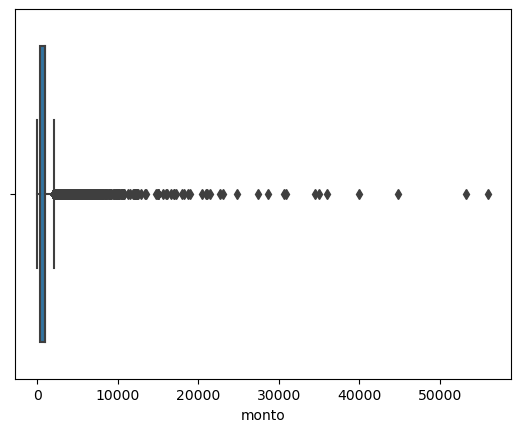

In [30]:
sns.boxplot(x=comprobantes["monto"])

#### Tendría en cuenta este valor máximo de monto, conocido como outlier (valor anómalo), ya que hay otros números que también tienen otros valores altos dentro del monto como por ejemplo el 60.000. Entonces, es por eso que no lo eliminaría.

____

# 14) No tenga en cuenta el valor máximo para los siguientes análisis

In [31]:
sin_valor_maximo = comprobantes[comprobantes["monto"] < 56000]
sin_valor_maximo

,Unnamed: 0,nro_comprobante,fecha,monto,id_cliente,tipo,anio_mes
0,0,FAC B0001-00000001,2015-12-10,1.00,675.0,FAC,2015-12
1,1,FAC B0001-00000002,2015-12-10,1.00,675.0,FAC,2015-12
2,2,FAC B0001-00000003,2015-12-28,999.99,123.0,FAC,2015-12
3,3,FAC B0001-00000004,2015-12-28,34.21,123.0,FAC,2015-12
4,4,FAC B0001-00000005,2015-12-28,0.71,123.0,FAC,2015-12
...,...,...,...,...,...,...,...
41324,41324,REC X0099-00006790,2018-09-04,2000.00,16.0,REC,2018-09
41325,41325,REC X0099-00006791,2018-09-04,1000.00,931.0,REC,2018-09
41326,41326,REC X0099-00006792,2018-09-04,2550.00,650.0,REC,2018-09
41327,41327,REC X0099-00006793,2018-09-04,2900.00,528.0,REC,2018-09


In [32]:
sin_valor_maximo["monto"].value_counts()

monto
998.98     10219
1000.00      593
0.99         571
2000.00      492
1689.00      428
           ...  
61.12          1
11.45          1
77.37          1
66.05          1
3487.50        1
Name: count, Length: 8683, dtype: int64

___

# 15) En el total del dataset.

a. Cuanto representa lo facturado sobre lo cobrado.

b. Si sabe que lo facturado es el IVA ¿Tiene sentido? ¿Cómo lo interpretas?

In [33]:
# A) 

total_facturado_sobre_lo_cobrado = sin_valor_maximo[sin_valor_maximo["tipo"] == "FAC"]["monto"].sum() / sin_valor_maximo[(sin_valor_maximo["tipo"] == "REC") | (sin_valor_maximo["tipo"] == "N/D")]["monto"].sum()
total_facturado_sobre_lo_cobrado * 100

21.811152359857612

In [34]:
# B) 



___

____

# 16) Dataset dolar:

a. Repita puntos 1,2,3 ahora para este dataset

b. Pasar a datetime la columna Fecha

c. Crear año-mes

In [35]:
dolarblue = pd.read_csv('/Users/lolonastri/Desktop/POO_UCEMA/modelos_primer_parcial/dolarblue_y_recibos/dolar_blue - Hoja 1.csv')
dolarblue

,Fecha,Compra,Venta
0,15-07-2022,"283,00","293,00"
1,14-07-2022,"279,00","289,00"
2,13-07-2022,"273,00","283,00"
3,12-07-2022,"262,00","272,00"
4,11-07-2022,"258,00","268,00"
...,...,...,...
1758,22-06-2015,"12,95","13,05"
1759,19-06-2015,"12,92","13,02"
1760,18-06-2015,"12,98","13,08"
1761,17-06-2015,"12,84","12,94"


# A)

In [36]:
# 1) 
# A
dolarblue.shape

(1763, 3)

In [37]:
print("Este dataset tiene " + str(dolarblue.shape[0]) + " filas y " + str(dolarblue.shape[1]) + " columnas")

Este dataset tiene 1763 filas y 3 columnas


In [38]:
# B

dolarblue.dtypes

Fecha     object
Compra    object
Venta     object
dtype: object

In [39]:
# 2) 
# A 

dolarblue.isna().sum()

Fecha     0
Compra    0
Venta     0
dtype: int64

In [40]:
# B

(dolarblue.isna().sum()/len(dolarblue)).round(6)

Fecha     0.0
Compra    0.0
Venta     0.0
dtype: float64

In [41]:
# C

dolarblue[dolarblue.isna().any(axis=1)]

,Fecha,Compra,Venta


In [42]:
# 3) 

dolarblue.describe()

,Fecha,Compra,Venta
count,1763,1763,1763
unique,1732,727,723
top,31-08-2021,"197,00","151,00"
freq,7,16,16


# B)

In [43]:
dolarblue["Fecha"] = pd.to_datetime(dolarblue["Fecha"])

/var/folders/xx/hcklcr8s0rxd7p5fz63z342w0000gn/T/ipykernel_10208/1413261073.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  dolarblue["Fecha"] = pd.to_datetime(dolarblue["Fecha"])


# C)

In [57]:
dolarblue["anio_mes"] = dolarblue["Fecha"].dt.strftime("%Y-%m")

In [58]:
dolarblue

,Fecha,Compra,Venta,anio_mes
0,2022-07-15,"283,00",293.00,2022-07
1,2022-07-14,"279,00",289.00,2022-07
2,2022-07-13,"273,00",283.00,2022-07
3,2022-07-12,"262,00",272.00,2022-07
4,2022-07-11,"258,00",268.00,2022-07
...,...,...,...,...
1758,2015-06-22,"12,95",13.05,2015-06
1759,2015-06-19,"12,92",13.02,2015-06
1760,2015-06-18,"12,98",13.08,2015-06
1761,2015-06-17,"12,84",12.94,2015-06


___

# 17)  Cree un dataset del valor promedio de la venta del dólar por año-mes (groupby).(fijarse ejercicio siguiente en caso de que no de nada de output)

In [46]:
dolarblue.dtypes

Fecha       datetime64[ns]
Compra              object
Venta               object
anio_mes            object
dtype: object

___

# 18) En python pase la columna Dolar Venta a Float.

(Hint en python dolar_df.Venta.apply(lambda x:x.replace(",","."))))

```python
def reemplazar(x):
    return x.replace(",", ".")

df['Venta'] = df['Venta'].apply(reemplazar)
```

In [47]:
dolarblue["Venta"] = dolarblue["Venta"].apply(lambda x:x.replace(",","."))
dolarblue["Venta"] = dolarblue["Venta"].astype(float)


In [48]:
dolar_df_mensual = dolarblue.groupby("anio_mes").agg(precio_dolar = ("Venta", "mean")).reset_index()

dolar_df_mensual

,anio_mes,precio_dolar
0,2015-06,13.213636
1,2015-07,14.226818
2,2015-08,15.236500
3,2015-09,15.754545
4,2015-10,15.869524
...,...,...
81,2022-03,201.666667
82,2022-04,199.736842
83,2022-05,204.350000
84,2022-06,218.450000


___

# 19) Cree un dataset que sea el resultado de hacer un merge/join entre el dataset agrupado de recibos_facts_debitos con el agrupado de dolar del punto anterior.

(Hint en python pd.merge(rec_mensual, dolar_df_mensual,how="left",
left_index=True,right_index=True)

In [49]:
df_mensual = pd.merge(comprobantes_cobrados_por_mes, dolar_df_mensual ,how="left",left_index=True,right_index=True)
df_mensual


,suma_monto,cantidad_recibos,anio_mes,precio_dolar
anio_mes,,,,
2015-12,3339.00,4,NaN,NaN
2016-01,23217.27,24,NaN,NaN
2016-02,87138.09,61,NaN,NaN
2016-03,193843.65,158,NaN,NaN
2016-04,208850.76,171,NaN,NaN
...,...,...,...,...
2022-02,177288.65,189,NaN,NaN
2022-03,245495.68,209,NaN,NaN
2022-04,145510.59,148,NaN,NaN


___

# 20) Hacer un lineplot del total cobrado por año mes

<Axes: xlabel='anio_mes'>

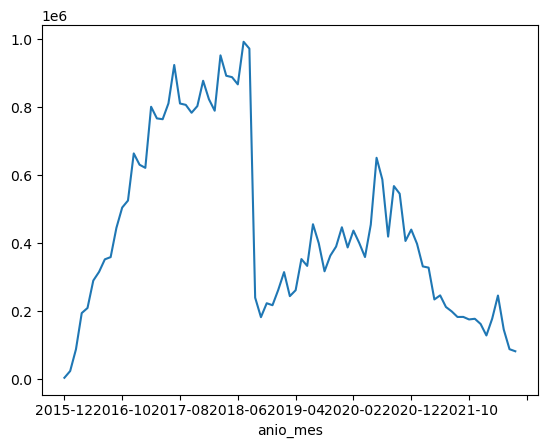

In [50]:
df_mensual["suma_monto"].plot()

___

# 21) Lineplot con clientes únicos por año mes en otro gráfico

In [51]:
clientes_unicos_por_mes = comprobantes.groupby("anio_mes").agg(clientes_unicos = ("id_cliente", "nunique"))

clientes_unicos_por_mes



,clientes_unicos
anio_mes,
2015-12,3
2016-01,17
2016-02,51
2016-03,107
2016-04,126
...,...
2022-02,44
2022-03,41
2022-04,35


<Axes: xlabel='anio_mes'>

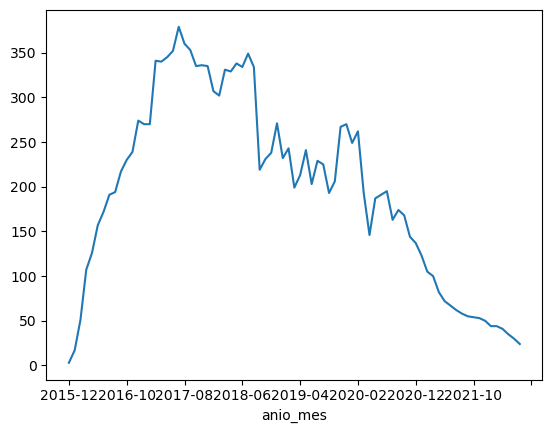

In [52]:
clientes_unicos_por_mes["clientes_unicos"].plot()

___

# 22) Poner ambas líneas en dos gráficos alineados en la misma columna

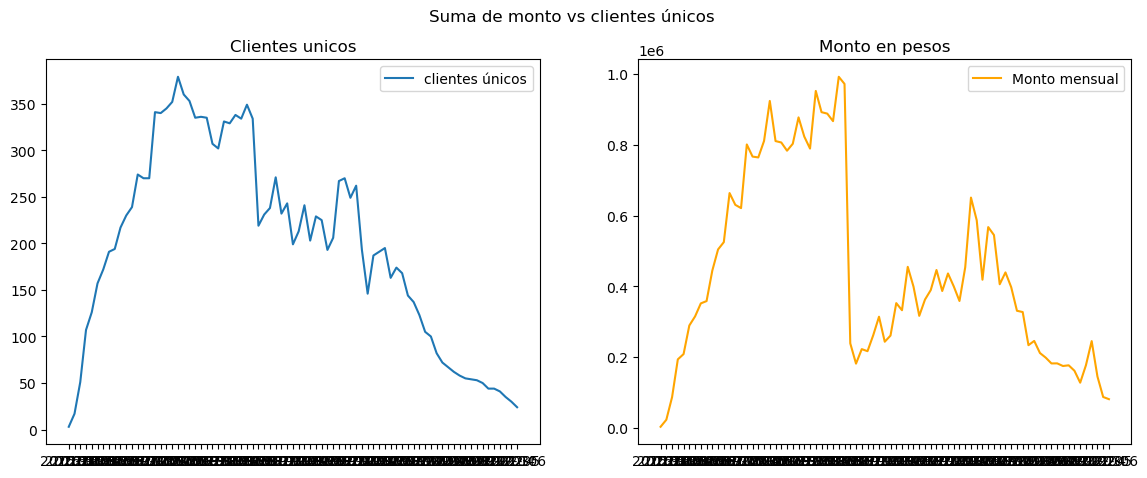

In [53]:
# Destructuring initialization
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(14,5)) # axs is a (1,2) nd-array

# First subplot
axs[0].plot(clientes_unicos_por_mes["clientes_unicos"], label="clientes únicos")
axs[0].set_title('Clientes unicos')
axs[0].legend()
# Second subplot
axs[1].plot(df_mensual["suma_monto"], label="Monto mensual", c='orange')
axs[1].set_title("Monto en pesos")
axs[1].legend()
# Global figure methods
plt.suptitle('Suma de monto vs clientes únicos')
plt.show()

___

# 23) Haga otro gráfico que le parezca interesante. ¿Qué idea transmite con ese gráfico?

___

# 24) Imprima la ubicación de este notebook (el path)

In [54]:
!pwd

/Users/lolonastri/Desktop/POO_UCEMA/modelos_primer_parcial/dolarblue_y_recibos


___

# *_TEORÍA_*

# 1) Teniendo en cuenta este dataset ¿Qué problema podrías resolver con Machine Learning?

#### Dado que es una empresa que cobra préstamos y a esa dinero lo vuelve a colocar. Poder predecir cuanto dinero voy a cobrar mes a mes me permitiría tener una proyección clara de los fondos que voy a disponer para distintas estrategias financieras. Saber tambien cuanto dinero voy a cobrar los siguientes meses podría permitirme entnder a cuanto tiempo colocar el dinero, si lo coloco a un plazo muy largo y empiezo a cobrar menos, tal vez me quede sin dinero, si lo hago a muy corto plazo estimando que voy a cobrar mucho dinero podría también estar tomando un mala decisión.

# 2) En caso de embarcarse en una tarea de Machine Learning. Describa el proceso CRISPDM y expliquelo para este caso.

#### El proceso CRISPDM tiene cómo etapas el entendimiento del negocio, el entendimiento de la data, la preparación o procesamiento, la evaluación y el deployment. En este caso habría que entender el valor económico de tener en claro que monto se va a cobrar para saber si justifica o no el modelo. Una vez entendido habría que buscar entender que columnas pueden favores a predecir cuanto se va a cobrar. ¿Los préstamos a cobrar están determinados por las condiciones macroeconómicas o también está determinado por cuantos préstamos se dieron los meses anteriores?. En caso de la preparación de la data en este caso habría que repetir eliminar los nulos y outliers. El modelo debería predecir una valor continuo, el monto a cobrar mensual. Para evaluarlo deberíamos hacer un back testing evaluando meses que conocemos sus resultados vs el valor del modelo. El deployment podría ser 1 vez al mes, no necesita ser real time.

# 3) ¿Qué decisión del negocio o tarea se podría automatizar o escalar? ¿Por qué?

#### Podría automatizar la decisión de transferir al broker la cantidad de dinero a utilizar en estrategias y los plazos. Por otro lado cómo también tengo la data a nivel cliente podría predecir cuál es la probabilidad que un cliente individual pague el mes siguiente. Es analogo a los recibos totales pero a nivle individual. Podría automatizar un mensaje al cliente días previos al vencimiento de la cuota o un sistema de ranking para priorizar a cobradores de la empresa. Tendrían que llamar primer oa los clientes con mayor probabilidad de no pagar o menor probabilidad de pagar.